# 🌍**Análisis de Emisiones de CO₂ por país y fuente**

En este trabajo se realizará un análisis exploratorio de datos enfocado en las emisiones de CO₂ por país, año y fuente de emisión. 
Para ello, es indispensable utilizar bibliotecas de Python como **Numpy**, **Pandas**, **Matplotlib** y **Seaborn**, que permiten manipular los datos y generar gráficos para facilitar la interpretación.

In [1]:
# A continuación, se cargan las bibliotecas necesarias:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator
from CoolProp.CoolProp import PropsSI

# **1. Carga de datos**

En esta sección cargaremos el conjunto de datos con la información sobre las emisiones de CO₂ por distintas fuentes. Es importante que los archivos se encuentren en la misma carpeta que el notebook para acceder a ellos.

Usaremos la función `pd.read_csv()` de la biblioteca **Pandas** para leer cada archivo `.csv` de manera individual.

## ***1.1 Emisiones por petróleo*** 🛢️

Cargamos los datos relacionados con las emisiones de CO₂ derivadas del uso de petróleo.

In [2]:
df_oil = pd.read_csv("Data/annual-co-emissions-from-oil.csv")

# Renombrar nombre de columna de emisiones
df_oil = df_oil.rename(columns={"Annual CO₂ emissions from oil": "Oil Emissions (Mt)"})
df_oil = df_oil.rename(columns={"Entity": "Country"})

# Convertir de toneladas a millones de toneladas
df_oil["Oil Emissions (Mt)"] = df_oil["Oil Emissions (Mt)"] / 1000000

df_oil

,Country,Year,Oil Emissions (Mt)
0,Argentina,1990,59.188256
1,Argentina,1991,61.232770
2,Argentina,1992,63.632690
3,Argentina,1993,67.152220
4,Argentina,1994,67.203064
...,...,...,...
267,Venezuela,2019,52.135056
268,Venezuela,2020,38.288800
269,Venezuela,2021,33.280114
270,Venezuela,2022,40.048720


## ***1.2 Emisiones por gas natural*** 💨

In [3]:
df_gas = pd.read_csv("Data/annual-co-emissions-from-gas.csv")

# Renombrar nombre de columna de emisiones
df_gas = df_gas.rename(columns={"Annual CO₂ emissions from gas": "Gas Emissions (Mt)"})
df_gas = df_gas.rename(columns={"Entity": "Country"})

# Convertir de toneladas a millones de toneladas
df_gas["Gas Emissions (Mt)"] = df_gas["Gas Emissions (Mt)"] / 1000000

df_gas

,Country,Year,Gas Emissions (Mt)
0,Argentina,1990,43.213216
1,Argentina,1991,47.283920
2,Argentina,1992,48.302510
3,Argentina,1993,40.807240
4,Argentina,1994,42.676988
...,...,...,...
267,Venezuela,2019,34.474576
268,Venezuela,2020,25.713952
269,Venezuela,2021,28.601184
270,Venezuela,2022,29.616872


## ***1.3 Emisiones por carbón*** 

In [4]:
df_coal = pd.read_csv("Data/annual-co-emissions-from-coal.csv")

# Renombrar nombre de columna de emisiones
df_coal = df_coal.rename(columns={"Annual CO₂ emissions from coal": "Coal Emissions (Mt)"})
df_coal = df_coal.rename(columns={"Entity": "Country"})

# Convertir de toneladas a millones de toneladas
df_coal["Coal Emissions (Mt)"] = df_coal["Coal Emissions (Mt)"] / 1000000

df_coal

,Country,Year,Coal Emissions (Mt)
0,Argentina,1990,3.140048
1,Argentina,1991,2.938528
2,Argentina,1992,3.107072
3,Argentina,1993,2.528239
4,Argentina,1994,3.561301
...,...,...,...
233,Venezuela,2019,0.285792
234,Venezuela,2020,0.197856
235,Venezuela,2021,0.197856
236,Venezuela,2022,0.672758


## ***1.4 Emisiones por cemento*** 🏗️

In [5]:
df_cement = pd.read_csv("Data/annual-co-emissions-from-cement.csv")

# Renombrar nombre de columna de emisiones
df_cement = df_cement.rename(columns={"Annual CO₂ emissions from cement": "Cement Emissions (Mt)"})
df_cement = df_cement.rename(columns={"Entity": "Country"})

# Convertir de toneladas a millones de toneladas
df_cement["Cement Emissions (Mt)"] = df_cement["Cement Emissions (Mt)"] / 1000000

df_cement

,Country,Year,Cement Emissions (Mt)
0,Argentina,1990,1.822000
1,Argentina,1991,2.196000
2,Argentina,1992,2.495000
3,Argentina,1993,2.761000
4,Argentina,1994,3.050000
...,...,...,...
267,Venezuela,2019,0.453465
268,Venezuela,2020,0.579646
269,Venezuela,2021,0.985793
270,Venezuela,2022,0.985793


## ***1.5 Emisiones por quema de gas (flaring)*** 🔥

In [6]:
df_flaring = pd.read_csv("Data/annual-co-emissions-from-flaring.csv")

# Renombrar nombre de columna de emisiones
df_flaring = df_flaring.rename(columns={"Annual CO₂ emissions from flaring": "Flaring Emissions (Mt)"})
df_flaring = df_flaring.rename(columns={"Entity": "Country"})

# Convertir de toneladas a millones de toneladas
df_flaring["Flaring Emissions (Mt)"] = df_flaring["Flaring Emissions (Mt)"] / 1000000

df_flaring

,Country,Year,Flaring Emissions (Mt)
0,Argentina,1990,4.785184
1,Argentina,1991,4.103680
2,Argentina,1992,3.997424
3,Argentina,1993,4.752356
4,Argentina,1994,1.978066
...,...,...,...
267,Venezuela,2019,17.937872
268,Venezuela,2020,16.146835
269,Venezuela,2021,15.394991
270,Venezuela,2022,16.190449


## ***1.6 Emisiones de CO2***

In [7]:
df_emissions = pd.read_csv("Data/co2-by-source.csv")

# Renombrar nombre de columna de emisiones
df_emissions = df_emissions.rename(columns={"Flaring": "Flaring Emissions (Mt)"})
df_emissions = df_emissions.rename(columns={"Cement": "Cement Emissions (Mt)"})
df_emissions = df_emissions.rename(columns={"Gas": "Gas Emissions (Mt)"})
df_emissions = df_emissions.rename(columns={"Oil": "Oil Emissions (Mt)"})
df_emissions = df_emissions.rename(columns={"Coal": "Coal Emissions (Mt)"})
df_emissions = df_emissions.rename(columns={"Entity": "Country"})

# Convertir de toneladas a millones de toneladas
df_emissions["Flaring Emissions (Mt)"] = df_emissions["Flaring Emissions (Mt)"] / 1000000
df_emissions["Cement Emissions (Mt)"] = df_emissions["Cement Emissions (Mt)"] / 1000000
df_emissions["Gas Emissions (Mt)"] = df_emissions["Gas Emissions (Mt)"] / 1000000
df_emissions["Oil Emissions (Mt)"] = df_emissions["Oil Emissions (Mt)"] / 1000000
df_emissions["Coal Emissions (Mt)"] = df_emissions["Coal Emissions (Mt)"] / 1000000

# Convertir a número entero los años
df_emissions = df_emissions.dropna(subset=["Year"])
df_emissions["Year"] = df_emissions["Year"].astype(int)

df_emissions

,Country,Code,Year,Other industry,Flaring Emissions (Mt),Cement Emissions (Mt),Gas Emissions (Mt),Oil Emissions (Mt),Coal Emissions (Mt)
0,Argentina,ARG,1990,NaN,4.785184,1.822000,43.213216,59.188256,3.140048
1,Argentina,ARG,1991,NaN,4.103680,2.196000,47.283920,61.232770,2.938528
2,Argentina,ARG,1992,NaN,3.997424,2.495000,48.302510,63.632690,3.107072
3,Argentina,ARG,1993,NaN,4.752356,2.761000,40.807240,67.152220,2.528239
4,Argentina,ARG,1994,NaN,1.978066,3.050000,42.676988,67.203064,3.561301
...,...,...,...,...,...,...,...,...,...
267,Venezuela,VEN,2019,NaN,17.937872,0.453465,34.474576,52.135056,0.285792
268,Venezuela,VEN,2020,NaN,16.146835,0.579646,25.713952,38.288800,0.197856
269,Venezuela,VEN,2021,NaN,15.394991,0.985793,28.601184,33.280114,0.197856
270,Venezuela,VEN,2022,NaN,16.190449,0.985793,29.616872,40.048720,0.672758


# **2. Análisis exploratorio de datos (EDA)**

Antes de realizar los gráficos, es importante revisar cómo están organizados los datos, qué información contienen y si hay valores faltantes o errroes.

En esta sección se realizará lo siguiente:
  1. Ver qué columnas tiene cada archivo y qué tipo de datos hay
  2. Ver resumen estadístico con máximos, mínimos
  3. Agrupar los datos por país y por año
  4. Revisar si hay valores nulos que puedan afectar el análisis

## ***2.1 Información general de los datos***

Usando `df.info()` se muestra la estructura del dataframe para cada fuente.

In [8]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             272 non-null    object 
 1   Year                272 non-null    int64  
 2   Oil Emissions (Mt)  272 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [9]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             272 non-null    object 
 1   Year                272 non-null    int64  
 2   Gas Emissions (Mt)  272 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [10]:
df_coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              238 non-null    object 
 1   Year                 238 non-null    int64  
 2   Coal Emissions (Mt)  238 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


In [11]:
df_cement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                272 non-null    object 
 1   Year                   272 non-null    int64  
 2   Cement Emissions (Mt)  272 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [12]:
df_flaring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 272 non-null    object 
 1   Year                    272 non-null    int64  
 2   Flaring Emissions (Mt)  272 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [13]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 271
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 272 non-null    object 
 1   Code                    272 non-null    object 
 2   Year                    272 non-null    int64  
 3   Other industry          102 non-null    float64
 4   Flaring Emissions (Mt)  272 non-null    float64
 5   Cement Emissions (Mt)   272 non-null    float64
 6   Gas Emissions (Mt)      272 non-null    float64
 7   Oil Emissions (Mt)      272 non-null    float64
 8   Coal Emissions (Mt)     238 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 21.2+ KB


## ***2.2 Estadísticas descriptivas***

Para mostrar un resumen estadístico de los datos: media, desviación estándar, valores mínimos y máximos, etc, se utiliza `df.describe()`

In [14]:
df_oil.describe()

,Year,Oil Emissions (Mt)
count,272.000000,272.000000
mean,2006.500000,413.991078
std,9.828793,735.820535
min,1990.000000,10.647584
25%,1998.000000,47.234808
50%,2006.500000,142.256760
75%,2015.000000,262.855582
max,2023.000000,2642.555600


In [15]:
df_gas.describe()

,Year,Gas Emissions (Mt)
count,272.000000,272.000000
mean,2006.500000,224.259054
std,9.828793,425.604099
min,1990.000000,0.432352
25%,1998.000000,21.742576
50%,2006.500000,58.283824
75%,2015.000000,150.696520
max,2023.000000,1755.923500


In [16]:
df_coal.describe()

,Year,Coal Emissions (Mt)
count,238.000000,238.000000
mean,2006.500000,278.598919
std,9.831384,623.279949
min,1990.000000,0.000000
25%,1998.000000,4.298704
50%,2006.500000,36.932020
75%,2015.000000,73.930930
max,2023.000000,2188.336600


In [17]:
df_cement.describe()

,Year,Cement Emissions (Mt)
count,272.000000,272.000000
mean,2006.500000,11.470461
std,9.828793,12.215518
min,1990.000000,0.453465
25%,1998.000000,3.112500
50%,2006.500000,5.543941
75%,2015.000000,16.942903
max,2023.000000,46.850744


In [18]:
df_flaring.describe()

,Year,Flaring Emissions (Mt)
count,272.000000,272.000000
mean,2006.500000,12.289031
std,9.828793,15.820087
min,1990.000000,0.458168
25%,1998.000000,1.889822
50%,2006.500000,5.742707
75%,2015.000000,15.771975
max,2023.000000,88.436970


In [19]:
df_emissions.describe()

,Year,Other industry,Flaring Emissions (Mt),Cement Emissions (Mt),Gas Emissions (Mt),Oil Emissions (Mt),Coal Emissions (Mt)
count,272.000000,1.020000e+02,272.000000,272.000000,272.000000,272.000000,238.000000
mean,2006.500000,1.185456e+07,12.289031,11.470461,224.259054,413.991078,278.598919
std,9.828793,1.125130e+07,15.820087,12.215518,425.604099,735.820535,623.279949
min,1990.000000,2.055910e+06,0.458168,0.453465,0.432352,10.647584,0.000000
25%,1998.000000,3.164460e+06,1.889822,3.112500,21.742576,47.234808,4.298704
50%,2006.500000,5.457500e+06,5.742707,5.543941,58.283824,142.256760,36.932020
75%,2015.000000,2.479912e+07,15.771975,16.942903,150.696520,262.855582,73.930930
max,2023.000000,3.238450e+07,88.436970,46.850744,1755.923500,2642.555600,2188.336600


## ***2.3 Agrupaciones por país y año***

Utilizamos `df.groupby()` para agrupar las emisiones por países y por año. De esta manera se conoce qué país y en qué años se generan más emisiones de CO₂

In [20]:
# Suma de las emisiones de CO₂ por carbón en cada país

df_emissions.groupby(["Country"])["Coal Emissions (Mt)"].sum()

Country
Argentina          121.934741
Brazil            1826.647964
Canada            3177.745632
Colombia           440.425619
Ecuador              0.000000
Mexico            1232.715104
United States    59486.360230
Venezuela           20.713493
Name: Coal Emissions (Mt), dtype: float64

In [21]:
# Valor promedio de las emisiones de CO₂ por país

df_emissions.groupby(["Country"])[["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"]].mean()

,Coal Emissions (Mt),Oil Emissions (Mt),Gas Emissions (Mt),Cement Emissions (Mt),Flaring Emissions (Mt)
Country,,,,,
Argentina,3.586316,75.241461,76.674306,3.508975,1.794345
Brazil,53.724940,258.107075,40.900394,17.991092,13.119529
Canada,93.463107,242.557770,181.982810,6.538822,15.308233
Colombia,12.953695,37.957588,16.555665,4.265561,1.139816
Ecuador,NaN,25.875999,0.921178,1.726480,2.025441
Mexico,36.256327,257.912034,110.389152,15.991516,5.999438
United States,1749.598830,2335.160100,1321.386221,38.983890,49.592337
Venezuela,0.609220,79.116601,45.262705,2.757353,9.333107


In [22]:
# Valor promedio de las emisiones de CO₂ por año

df_emissions.groupby(["Year"])[["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"]].mean()

,Coal Emissions (Mt),Oil Emissions (Mt),Gas Emissions (Mt),Cement Emissions (Mt),Flaring Emissions (Mt)
Year,,,,,
1990,283.538729,368.673656,162.998625,8.591985,10.297603
1991,282.218475,361.289061,166.259181,8.593997,10.073963
1992,285.430846,372.607933,169.141118,8.545690,10.240659
1993,293.812471,375.223352,175.076357,9.006440,10.694185
1994,296.961690,382.000341,180.808759,9.595141,9.652445
1995,300.493432,379.250614,190.051948,9.635048,9.909370
1996,312.450495,391.947740,195.920647,10.043301,9.914920
1997,319.947796,399.986960,198.191332,10.645202,10.437435
1998,324.606821,411.075966,194.350508,10.952940,10.467288


## ***2.4 Revisión de valores nulos***

En este paso se comprueba si hay datos vacíos en las columnas. Es importante porque pueden afectar el análisis o causar errores en los cálculos posteriores. Para esto utilizamos `df.isna().sum()`

In [23]:
df_emissions.isna().sum()

Country                     0
Code                        0
Year                        0
Other industry            170
Flaring Emissions (Mt)      0
Cement Emissions (Mt)       0
Gas Emissions (Mt)          0
Oil Emissions (Mt)          0
Coal Emissions (Mt)        34
dtype: int64

# **3. Gráficos**

## ***3.1 Gráficos de barras***

### 3.1.1 Emisiones de CO₂ por país y por fuente

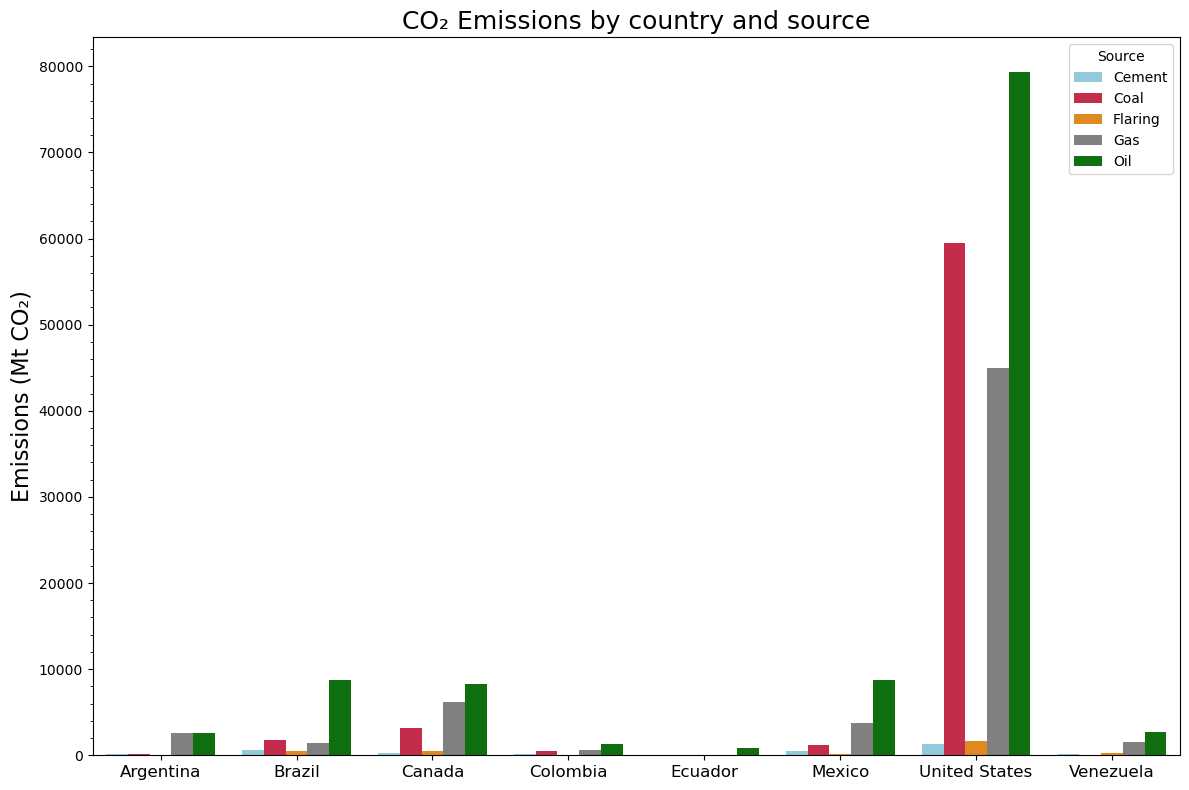

In [24]:
# Reorganizar los datos para tener las fuentes en una sola columna

df_long = df_emissions.melt(
    id_vars=["Country", "Year"],
    value_vars=["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"],
    var_name="Source",
    value_name="Emissions")

df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})

# Agrupar por país y fuente
df_grouped = df_long.groupby(["Country", "Source_short"])["Emissions"].sum().reset_index()

custom_colors = {
    "Oil": "green",
    "Gas": "gray",
    "Coal": "crimson",
    "Flaring": "darkorange",
    "Cement": "skyblue"}

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_grouped, x="Country", y="Emissions", hue="Source_short", palette=custom_colors)
plt.title("CO₂ Emissions by country and source",size=18)
plt.ylabel("Emissions (Mt CO₂)",size=16)
plt.xlabel("")
plt.legend(title="Source")
plt.xticks(rotation=0, size=12)
plt.yticks(size=10)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_country.png", dpi=300)

### 3.1.2 Emisiones de CO₂ por año y por fuente

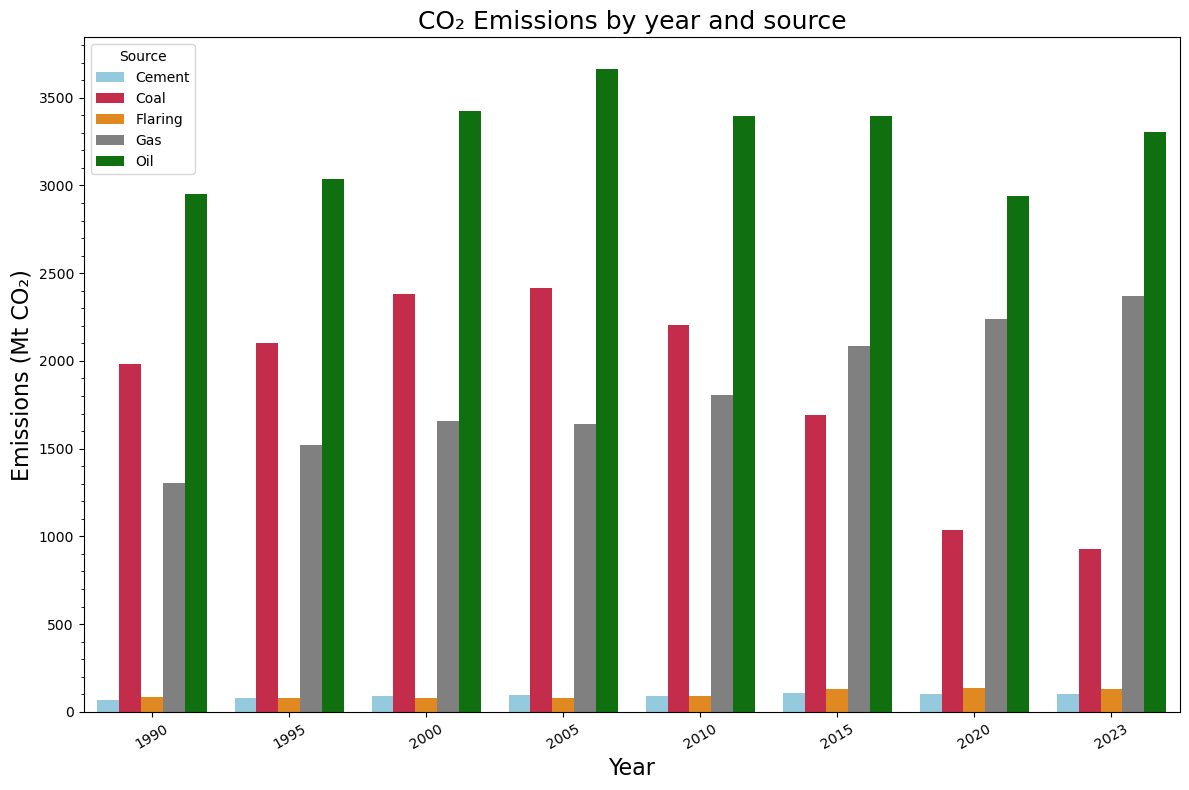

In [25]:
#Agrupar por año y fuente
df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})
df_grouped = df_long.groupby(["Year", "Source_short"])["Emissions"].sum().reset_index()
años_interes = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2023]
df_filtrado = df_grouped[df_grouped["Year"].isin(años_interes)].copy()
df_filtrado["Year"] = df_filtrado["Year"].astype(int)

custom_colors = {
    "Oil": "green",
    "Gas": "gray",
    "Coal": "crimson",
    "Flaring": "darkorange",
    "Cement": "skyblue"}

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_filtrado, x="Year", y="Emissions", hue="Source_short", palette=custom_colors)
plt.title("CO₂ Emissions by year and source",size=18)
plt.ylabel("Emissions (Mt CO₂)",size=16)
plt.xlabel("Year",size=16)
plt.xticks(rotation=30, size=10)
plt.yticks(size=10)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tight_layout()
plt.legend(title="Source")
plt.show()

fig.savefig("Plots/CO2_year.png", dpi=300)

## ***3.2 Gráficos de líneas***

### 3.2.1 Emisiones de CO₂ por fuente a lo largo del tiempo

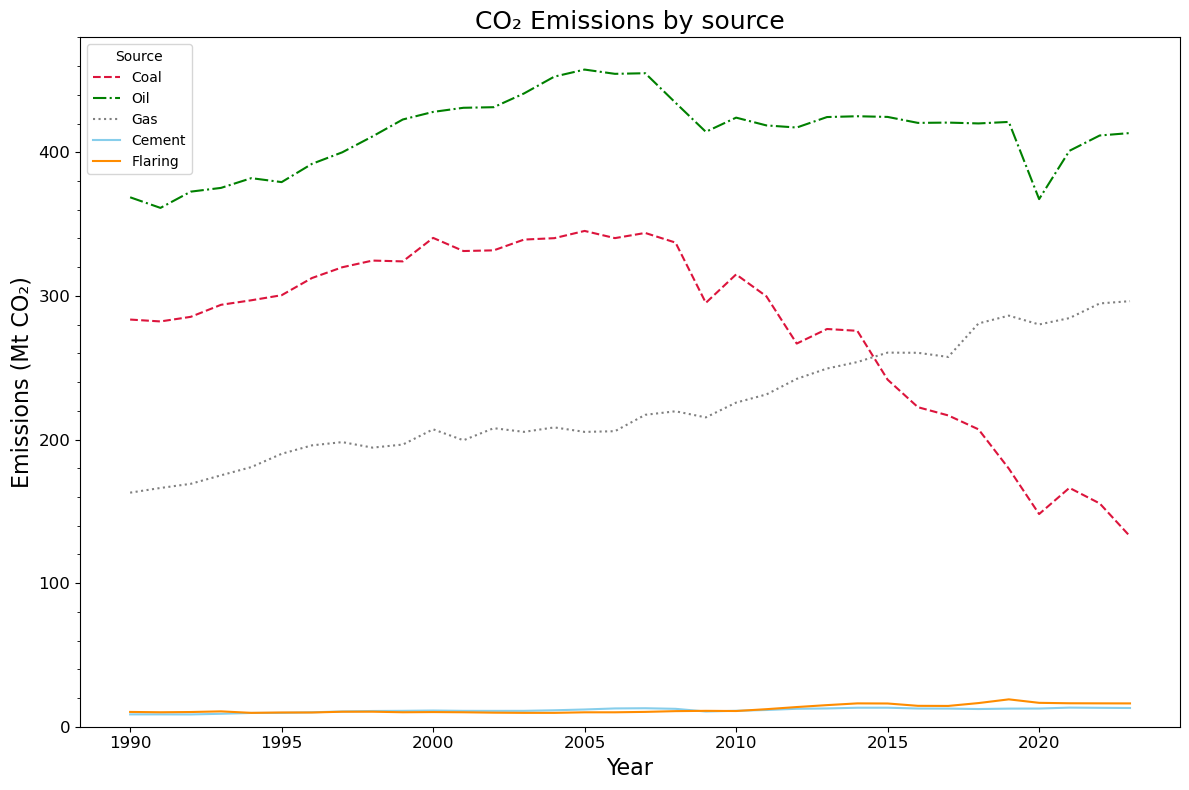

In [26]:
# Agrupar por año y sumar emisiones por fuente
df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})

df_grouped = df_emissions.groupby("Year")[["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"]].mean().reset_index()

fig, ax = plt.subplots(figsize=(12,8))
year = np.array(df_grouped["Year"])
coal_emissions = np.array(df_grouped["Coal Emissions (Mt)"])
oil_emissions = np.array(df_grouped["Oil Emissions (Mt)"])
gas_emissions = np.array(df_grouped["Gas Emissions (Mt)"])
cement_emissions = np.array(df_grouped["Cement Emissions (Mt)"])
flaring_emissions = np.array(df_grouped["Flaring Emissions (Mt)"])

ax.plot(year, coal_emissions, c="crimson", ls="--", label="Coal")
ax.plot(year, oil_emissions, c="green", ls="-.", label="Oil")
ax.plot(year, gas_emissions, c="gray", ls=":", label="Gas")
ax.plot(year, cement_emissions, c="skyblue", label="Cement")
ax.plot(year, flaring_emissions, c="darkorange", label="Flaring")

ax.set_ylim(bottom=0)

# Etiquetas y leyenda
plt.title("CO₂ Emissions by source",size=18)
ax.set_xlabel("Year",size=16)
ax.set_ylabel("Emissions (Mt CO₂)",size=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.legend(title="Source", loc=0)
plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_source.png", dpi=300)

### 3.2.2 Emisiones de CO₂ por país y por fuente

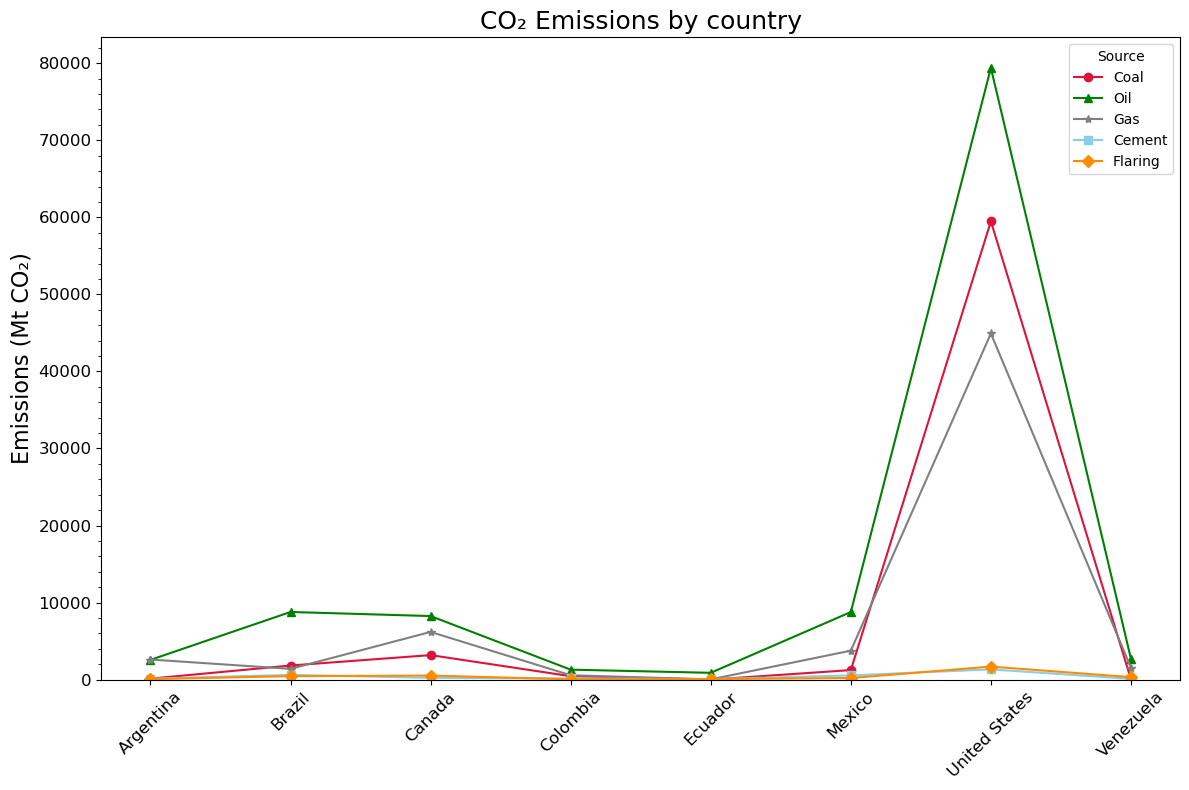

In [27]:
# Agrupar por país y sumar emisiones por fuente
df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})
df_grouped = df_emissions.groupby("Country")[["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"]].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,8))
year = np.array(df_grouped["Country"])
coal_emissions = np.array(df_grouped["Coal Emissions (Mt)"])
oil_emissions = np.array(df_grouped["Oil Emissions (Mt)"])
gas_emissions = np.array(df_grouped["Gas Emissions (Mt)"])
cement_emissions = np.array(df_grouped["Cement Emissions (Mt)"])
flaring_emissions = np.array(df_grouped["Flaring Emissions (Mt)"])

ax.plot(year, coal_emissions, c="crimson", label="Coal",  marker="o")
ax.plot(year, oil_emissions, c="green", label="Oil", marker="^")
ax.plot(year, gas_emissions, c="gray", label="Gas",  marker="*")
ax.plot(year, cement_emissions, c="skyblue", label="Cement", marker="s")
ax.plot(year, flaring_emissions, c="darkorange", label="Flaring", marker="D")

ax.set_ylim(bottom=0)

# Etiquetas y leyenda
plt.title("CO₂ Emissions by country",size=18)
ax.set_xlabel("")
ax.set_ylabel("Emissions (Mt CO₂)",size=16)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.legend(title="Source", loc=0)

plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_lines_country.png", dpi=300)

## ***3.3 Gráficos de dispersión***

### 3.3.1 Emisiones de CO₂ por fuente a lo largo del tiempo

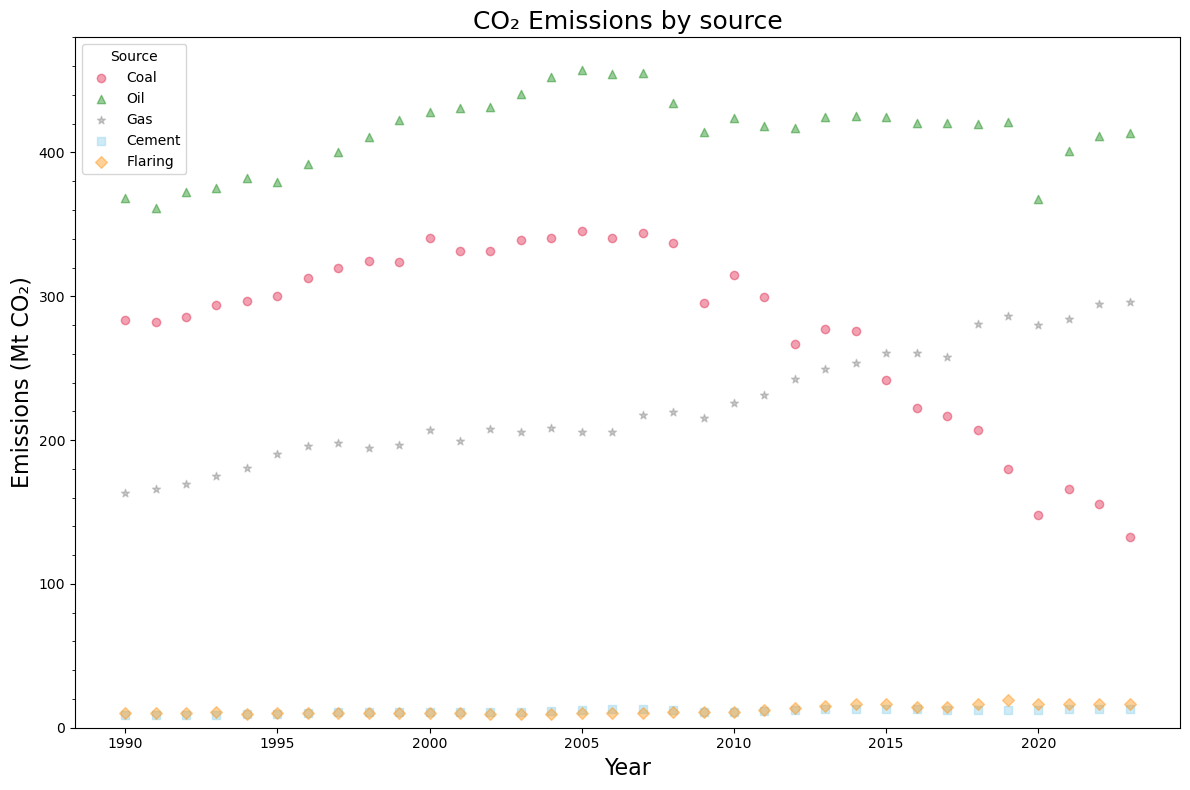

In [28]:
df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})
df_grouped = df_emissions.groupby("Year")[["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"]].mean().reset_index()

# Gráfico de dispersión para cada fuente
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_grouped["Year"], df_grouped["Coal Emissions (Mt)"], c="crimson", alpha=0.40, label="Coal", marker="o")
ax.scatter(df_grouped["Year"], df_grouped["Oil Emissions (Mt)"], c="green", alpha=0.40, label="Oil", marker="^")
ax.scatter(df_grouped["Year"], df_grouped["Gas Emissions (Mt)"], c="gray", alpha=0.40, label="Gas", marker="*")
ax.scatter(df_grouped["Year"], df_grouped["Cement Emissions (Mt)"], c="skyblue", alpha=0.40, label="Cement", marker="s")
ax.scatter(df_grouped["Year"], df_grouped["Flaring Emissions (Mt)"], c="darkorange", alpha=0.40, label="Flaring", marker="D")
ax.set_ylim(bottom=0)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Etiquetas
ax.set_xlabel("Year", size=16)
ax.set_ylabel("Emissions (Mt CO₂)", size=16)
ax.set_title("CO₂ Emissions by source", size=18)
ax.legend(title="Source")
plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_scatter_source.png", dpi=300)

### 3.3.2 Emisiones de CO₂ por país a lo largo del tiempo

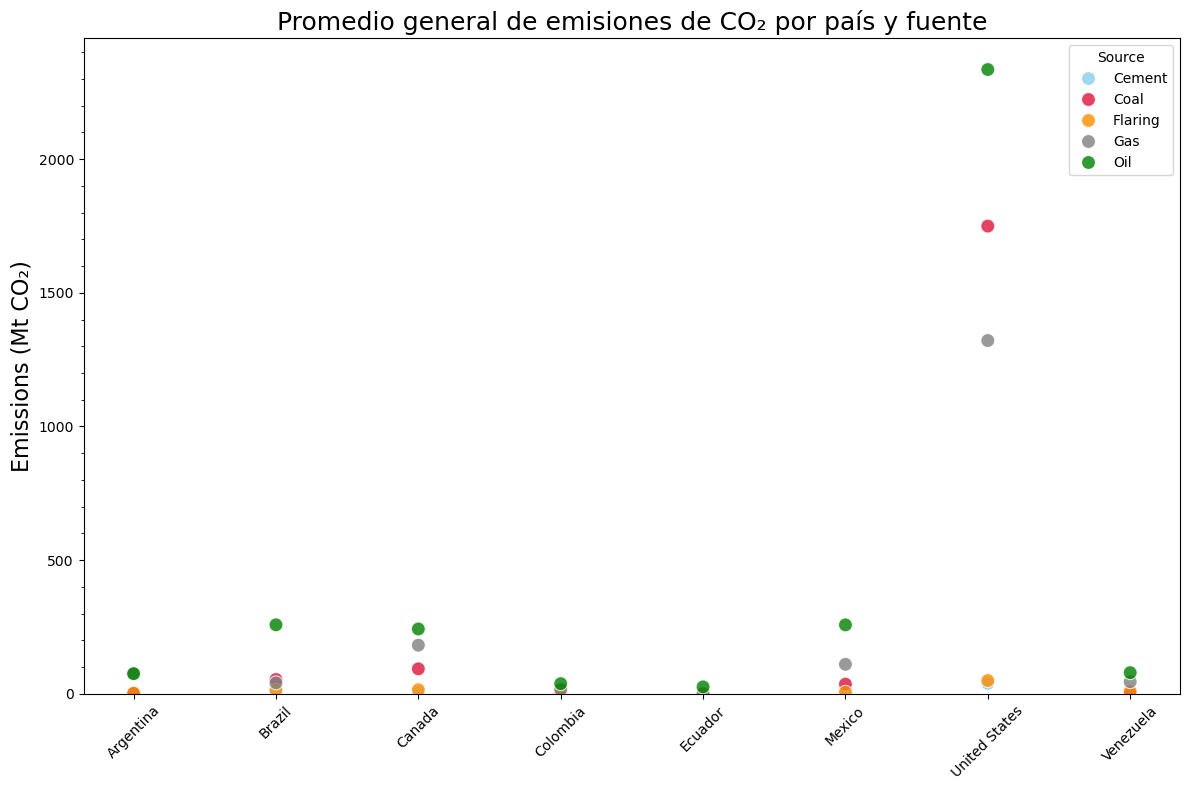

In [29]:
# Promedio general por país y fuente (Años 1990-2023)
df_avg = df_long.groupby(["Country", "Source_short"])["Emissions"].mean().reset_index()

# Colores por fuente
custom_colors = {
    "Oil": "green",
    "Gas": "gray",
    "Coal": "crimson",
    "Flaring": "darkorange",
    "Cement": "skyblue"}

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df_avg, x="Country", y="Emissions", hue="Source_short", palette=custom_colors, alpha=0.8, s=100)
plt.title("Promedio general de emisiones de CO₂ por país y fuente", size=18)
plt.xlabel("")
plt.ylabel("Emissions (Mt CO₂)", size=16)
plt.xticks(rotation=45)
plt.legend(title="Source")
ax.set_ylim(bottom=0)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tight_layout()
plt.show()

# Guardar imagen
fig.savefig("Plots/CO2_avg_by_country_source.png", dpi=300)

## ***3.4 Gráficos de caja***

### 3.4.1 Emisiones de CO₂ por fuente a lo largo del tiempo

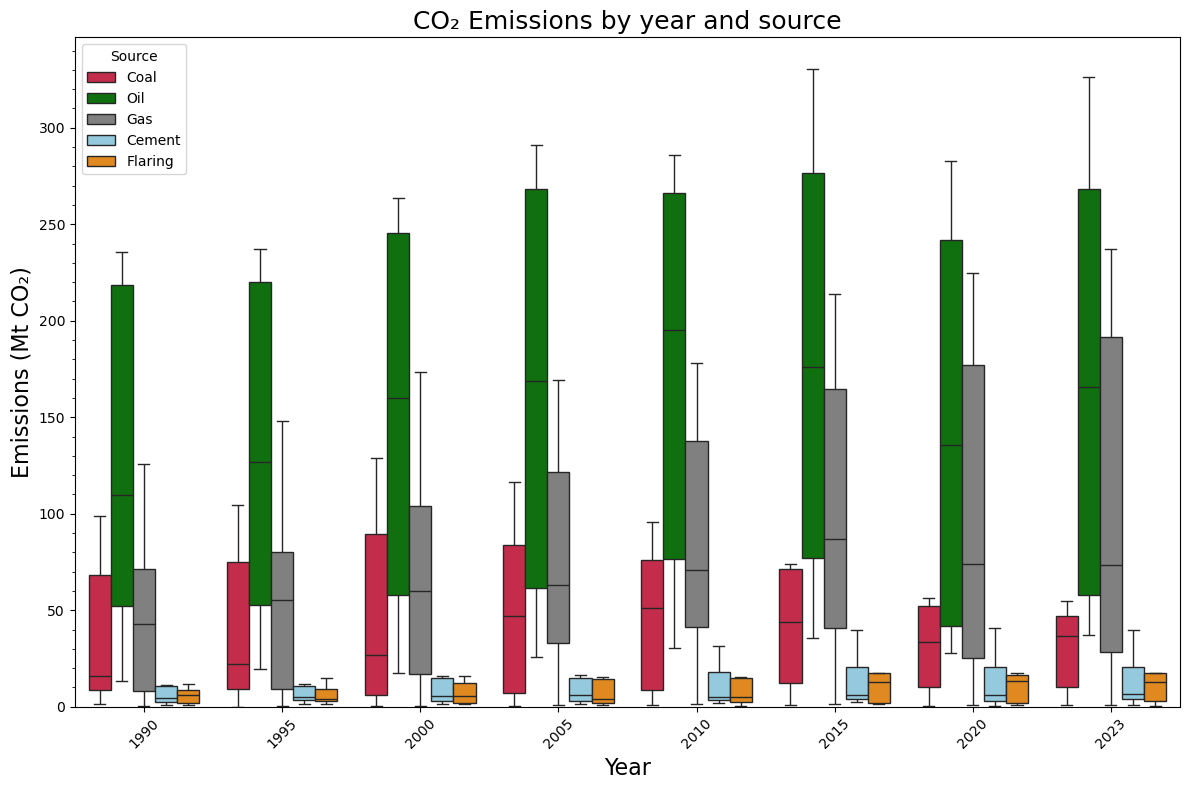

In [30]:
# Filtrar años
df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})
df_grouped = df_long.groupby(["Year", "Source_short"])["Emissions"].sum().reset_index()
años_interes = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2023]
df_filtrado = df_long[df_long["Year"].isin(años_interes)].copy()

df_filtrado["Year"] = df_filtrado["Year"].astype(int)

custom_colors = {
    "Oil": "green",
    "Gas": "gray",
    "Coal": "crimson",
    "Flaring": "darkorange",
    "Cement": "skyblue"}

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df_filtrado, x="Year", y="Emissions", hue="Source_short", palette=custom_colors, showfliers=False)
plt.title("CO₂ Emissions by year and source", size=18)
plt.xlabel("Year", size=16)
plt.ylabel("Emissions (Mt CO₂)", size=16)
plt.xticks(rotation=45)
plt.legend(title="Source")
ax.set_ylim(bottom=0)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_box_source.png", dpi=300)

### 3.4.2 Emisiones de CO₂ por país a lo largo del tiempo

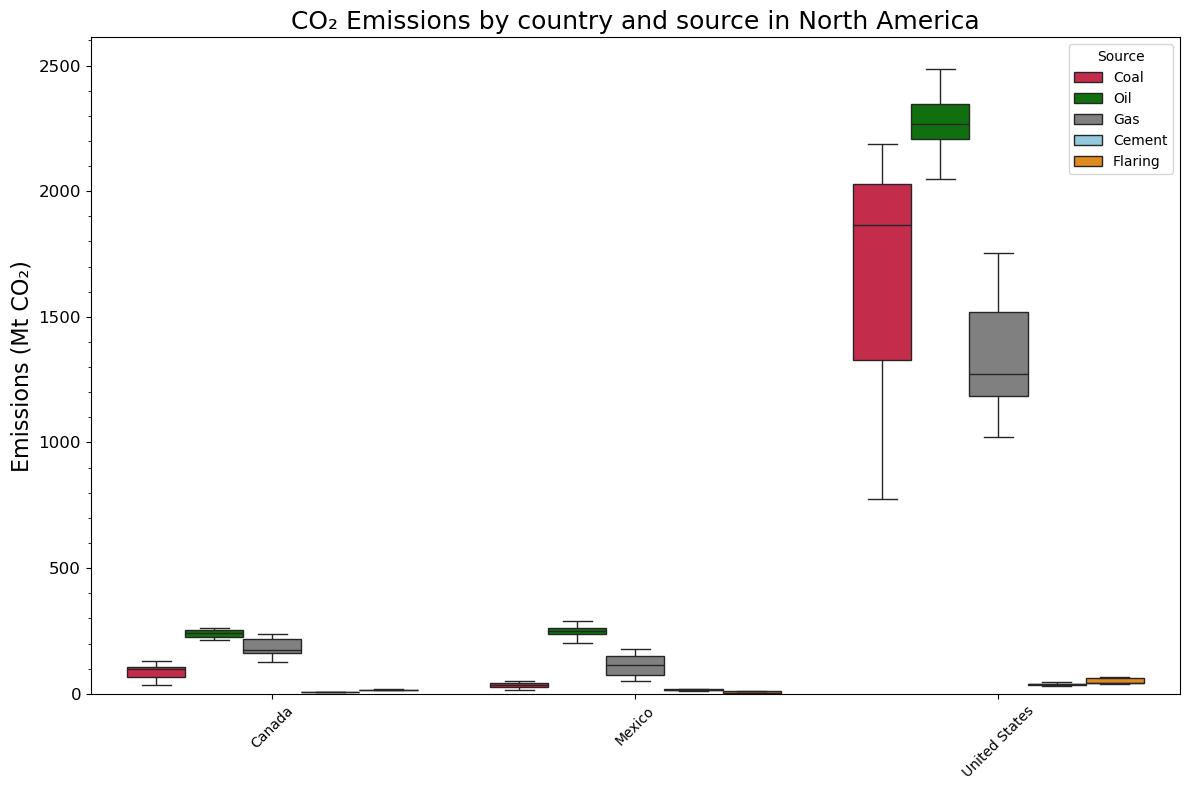

In [31]:
df_emissions = df_emissions.rename(columns={"Entity": "Country"})

df_long = df_emissions.melt(
    id_vars=["Country", "Year"],
    value_vars=["Coal Emissions (Mt)", "Oil Emissions (Mt)", "Gas Emissions (Mt)", "Cement Emissions (Mt)", "Flaring Emissions (Mt)"],
    var_name="Source",
    value_name="Emissions")

df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal",  "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})

años_interes = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2023]
df_filtrado = df_long[df_long["Year"].isin(años_interes)].copy()
df_filtrado["Year"] = df_filtrado["Year"].astype(int)

custom_colors = {
    "Oil": "green",
    "Gas": "gray",
    "Coal": "crimson",
    "Flaring": "darkorange",
    "Cement": "skyblue"}

paises_norteamerica = ["United States", "Canada", "Mexico"]
df_norteamerica = df_filtrado[df_filtrado["Country"].isin(paises_norteamerica)]

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df_norteamerica, x="Country", y="Emissions", hue="Source_short", palette=custom_colors, showfliers=False)
plt.title("CO₂ Emissions by country and source in North America", size=18)
plt.xlabel("")
plt.ylabel("Emissions (Mt CO₂)", size=16)
plt.xticks(rotation=45)
ax.set_ylim(bottom=0)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.legend(title="Source")
plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_box_North.png", dpi=300)

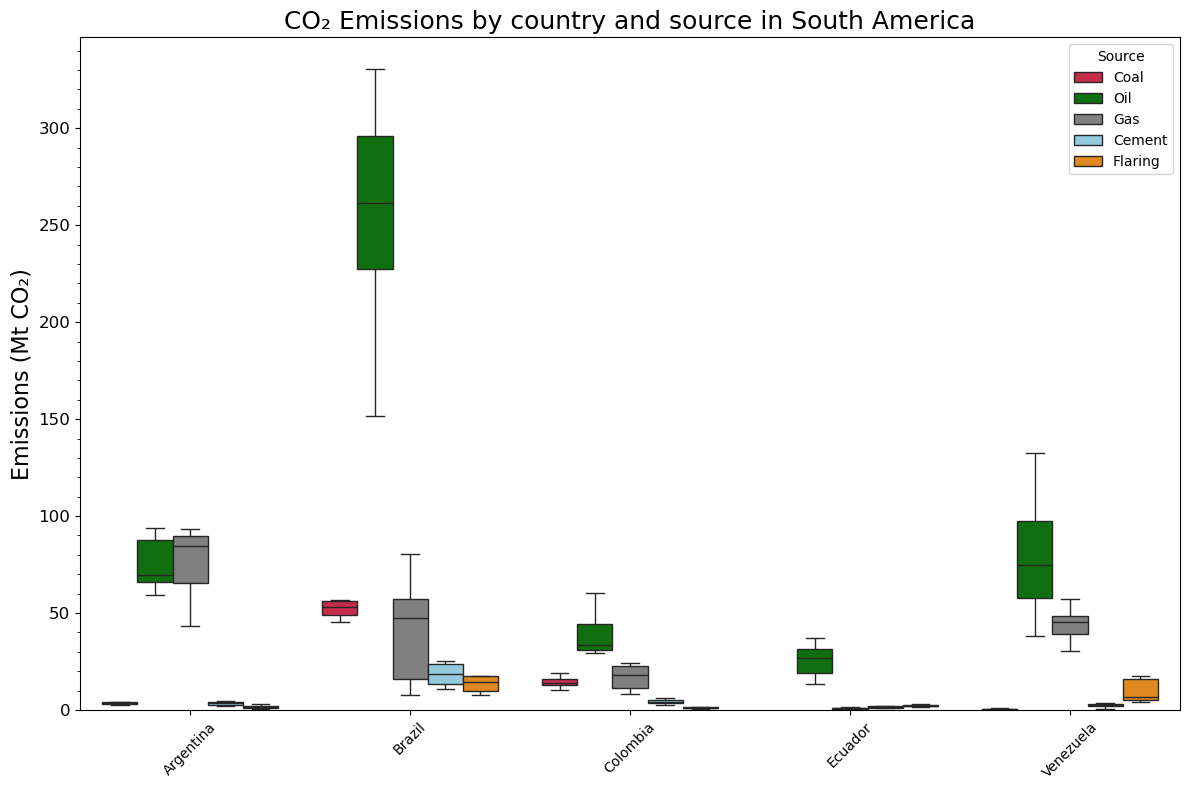

In [32]:
df_long["Source_short"] = df_long["Source"].replace({"Oil Emissions (Mt)": "Oil", "Gas Emissions (Mt)": "Gas", "Coal Emissions (Mt)": "Coal", "Flaring Emissions (Mt)": "Flaring", "Cement Emissions (Mt)": "Cement"})
df_grouped = df_long.groupby(["Year", "Source_short"])["Emissions"].sum().reset_index()

custom_colors = {
    "Oil": "green",
    "Gas": "gray",
    "Coal": "crimson",
    "Flaring": "darkorange",
    "Cement": "skyblue"}

paises_sudamerica = ["Argentina", "Brazil", "Colombia", "Venezuela", "Ecuador"]
df_sudamerica = df_filtrado[df_filtrado["Country"].isin(paises_sudamerica)]

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df_sudamerica, x="Country", y="Emissions", hue="Source_short", palette=custom_colors, showfliers=False)
plt.title("CO₂ Emissions by country and source in South America", size=18)
plt.xlabel("")
plt.ylabel("Emissions (Mt CO₂)", size=16)
ax.set_ylim(bottom=0)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()
plt.show()

fig.savefig("Plots/CO2_box_South.png", dpi=300)

### 3.4.5 Emisiones de CO₂ por país - Pairplot

In [33]:
df_emissions.columns
df_emissions

,Country,Code,Year,Other industry,Flaring Emissions (Mt),Cement Emissions (Mt),Gas Emissions (Mt),Oil Emissions (Mt),Coal Emissions (Mt)
0,Argentina,ARG,1990,NaN,4.785184,1.822000,43.213216,59.188256,3.140048
1,Argentina,ARG,1991,NaN,4.103680,2.196000,47.283920,61.232770,2.938528
2,Argentina,ARG,1992,NaN,3.997424,2.495000,48.302510,63.632690,3.107072
3,Argentina,ARG,1993,NaN,4.752356,2.761000,40.807240,67.152220,2.528239
4,Argentina,ARG,1994,NaN,1.978066,3.050000,42.676988,67.203064,3.561301
...,...,...,...,...,...,...,...,...,...
267,Venezuela,VEN,2019,NaN,17.937872,0.453465,34.474576,52.135056,0.285792
268,Venezuela,VEN,2020,NaN,16.146835,0.579646,25.713952,38.288800,0.197856
269,Venezuela,VEN,2021,NaN,15.394991,0.985793,28.601184,33.280114,0.197856
270,Venezuela,VEN,2022,NaN,16.190449,0.985793,29.616872,40.048720,0.672758


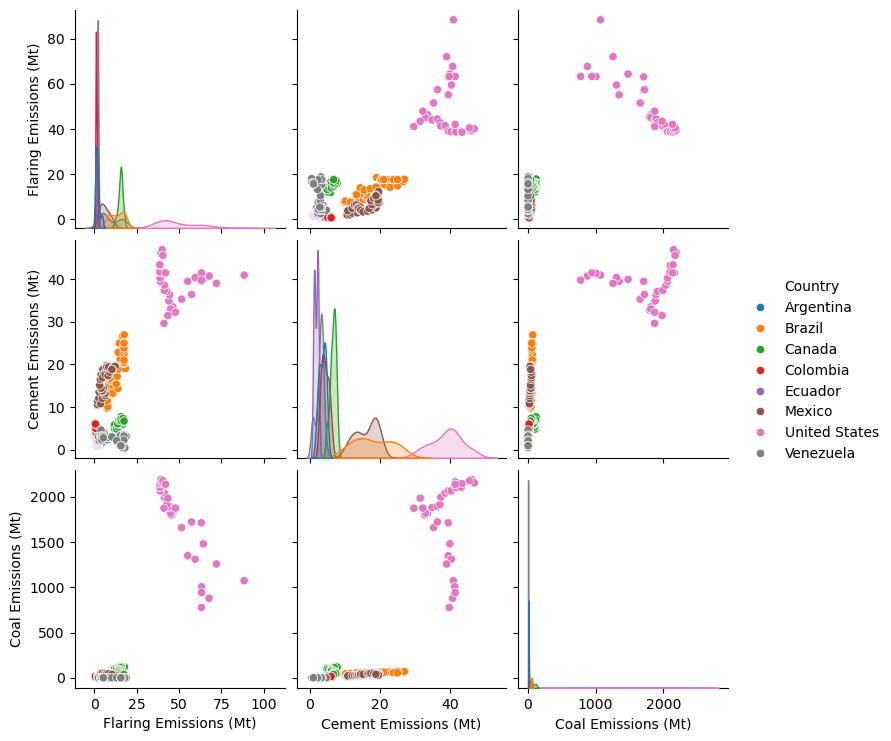

In [34]:
g = sns.pairplot(df_emissions.drop(columns=["Year", "Other industry", 'Gas Emissions (Mt)', 'Oil Emissions (Mt)'], axis=1), hue="Country")

plt.show()
g.savefig("Plots/CO2_pairplot1.png", dpi=300)

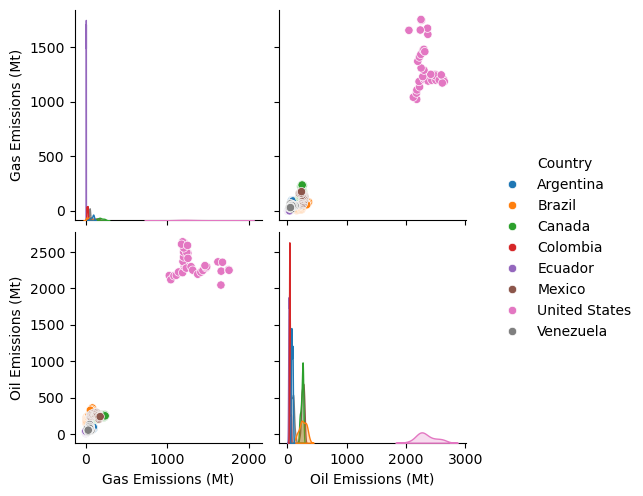

In [35]:
p = sns.pairplot(df_emissions.drop(columns=["Year", "Other industry", 'Flaring Emissions (Mt)',
                                        'Cement Emissions (Mt)', 'Coal Emissions (Mt)'], axis=1), hue="Country")

plt.show()
p.savefig("Plots/CO2_pairplot2.png", dpi=300)

### Ejemplo de CoolProp

In [36]:
P = 17.5e6   # Pa
T = 310.65   # K
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
print(f"Densidad del CO₂: {rho:.2f} kg/m³")

Densidad del CO₂: 828.73 kg/m³


# **4. Cálculos**

## ***4.1 Cálculo volumen de emisiones de CO₂ en América***

### 4.1.1 Emisiones de CO₂ en Norteamérica

In [37]:
north = ["Canada", "United States", "Mexico"]

# Agrupar y sumar emisiones por país
emissions_country = df_long.groupby("Country")["Emissions"].sum().reset_index()

emi_na = emissions_country[emissions_country["Country"].isin(north)]
total_na = emi_na["Emissions"].sum()

print("América del Norte:")
print(emi_na)

# print("\nTotal regional:")
print("\nTotal emisiones de CO₂ América del Norte:", round(total_na, 2), "Mt")

América del Norte:
         Country      Emissions
2         Canada   18354.925229
5         Mexico   14502.647854
6  United States  186820.526866

Total emisiones de CO₂ América del Norte: 219678.1 Mt


### 4.1.1 Emisiones de CO₂ en Sudamérica

In [38]:
south = ["Brazil", "Argentina", "Colombia", "Venezuela", "Ecuador"]

# Agrupar y sumar emisiones por país
emissions_country = df_long.groupby("Country")["Emissions"].sum().reset_index()

emi_sa = emissions_country[emissions_country["Country"].isin(south)]
total_sa = emi_sa["Emissions"].sum()

print("América del Sur:")
print(emi_sa)

# print("\nTotal regional:")
print("\nTotal emisiones de CO₂ América del Sur:", round(total_sa, 2), "Mt")

América del Sur:
     Country     Emissions
0  Argentina   5467.383713
1     Brazil  13050.663017
3   Colombia   2477.659063
4    Ecuador   1038.669331
7  Venezuela   4660.685556

Total emisiones de CO₂ América del Sur: 26695.06 Mt


## ***4.2 Capacidad de almacenamiento geológico de CO₂***

### 4.2.1 Canadá - Clive Field

In [39]:
# Datos - Leduc Formation CO2 EOR
P = 1.6596e7 #17.5e6   # Pa
T = 342.15 #310.65   # K
Depth = 1832    # m
Rf = 0.55  #0.20
A = 4.2e6   # m2
h = 180   # m
ϕ = 0.09
k = 95.02     # mD
Sw = 0.15
OOIP = 65.3e6 # m3
Bo = 1.30 

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1/ 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 18.38 Mt
La capacidad de almacenamiento de CO₂ es de: 15.96 Mt


### 4.2.2 Canadá - Redwater Oil Pool

In [40]:
# Datos - Leduc Formation
P = 7.4e6    # Pa
T = 307.15   # K
Depth = 984    # m
Rf = 0.50 
A = 23.4e6   # m2
h = 250   # m
ϕ = 0.12
k = 100     # mD
Sw = 0.20
OOIP = 317974600 # m3
Bo = 1.1236 

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1/ 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 76.33 Mt
La capacidad de almacenamiento de CO₂ es de: 38.46 Mt


### 4.2.3 Canadá - Quest 

In [41]:
# Datos - Basal Cambrian Sand (Saline Aquifer) - Dedicated Storage
P = 20e6    # Pa
T = 379.68   # K
Depth = 2330  # m
A = 1.5e7   # m2
h = 40   # m
ϕ = 0.18
k = 33-1000    # mD
Swirr = 0.25

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1/ 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 36.53 Mt


### 4.2.4 Canadá - Aquistore 

In [42]:
# Datos - Deadwood Formation (Saline Aquifer) - Dedicated Storage
P = 14.5e6    # Pa
T = 313.15   # K
Depth = 3200 # m
A = 3e7   # m2
h = 38.6   # m
ϕ = 0.15
k = 20    # mD
Swirr = 0.50

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1/ 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 67.06 Mt


### 4.2.5 Canadá - Joffre Field

In [43]:
# Datos - Joffre Viking CO2 EOR
P = 11.6e6  # Pa
T = 324.15   # K
Depth = 1400    # m
Rf = 0.48
A = 8.21e7  # m2
h = 20    # m
ϕ = 0.13
k = 349     # mD
Sw = 0.36
OOIP =  73611119.9  # m3
Bo = 1.1

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1/ 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 35.35 Mt
La capacidad de almacenamiento de CO₂ es de: 17.31 Mt


### 4.2.6 Canadá - Pembina Field

In [44]:
# Datos - Cardium Formation CO2 EOR
P = 19e6  # Pa
T = 323.15   # K
Depth = 1447    # m
Rf = 0.16
A = 1.75e9   # m2
h = 32    # m
ϕ = 0.164
k = 21.4     # mD
Sw = 0.24
OOIP = 2150303232.5  # m3
Bo = 1.1

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1/ 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 861.54 Mt
La capacidad de almacenamiento de CO₂ es de: 241.29 Mt


### 4.2.7 Canadá - Chigwell Field

In [45]:
# Datos - Viking E&I CO2 EOR
P = 9916000   # Pa
T = 313.15   # K
Depth = 1385.6    # m
Rf = 0.26
A = 2.385e7   # m2
h = 30   # m
ϕ = 0.13
k = 72.89     # mD
Sw = 0.38
OOIP = 31797460  # m3 
Bo = 1.0

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1/ 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 9.33 Mt
La capacidad de almacenamiento de CO₂ es de: 5.14 Mt


### 4.2.8 Canadá - Weyburn Field

In [46]:
# Datos - Vuggy Shoal CO2 EOR
P = 14e6   # Pa
T = 336.15  # K
Depth = 1450    # m
Rf = 0.35
A = 2.2e8    # m2
h = 20   # m
ϕ = 0.15
k = 300    # mD
Sw = 0.35
OOIP = 238480950 # m3
Bo = 1.20 

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9 , 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 79.2 Mt
La capacidad de almacenamiento de CO₂ es de: 36.69 Mt


In [47]:
# Datos - Marly CO2 EOR
P = 14e6   # Pa
T = 336.15  # K
Depth = 1450    # m
Rf = 0.35
A = 2.2e8    # m2
h = 6   # m
ϕ = 0.29
k = 10    # mD
Sw = 0.35
OOIP = 238480950 # m3
Bo = 1.20 

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 45.93 Mt
La capacidad de almacenamiento de CO₂ es de: 36.69 Mt


### Gráfico Capacidad de almacenamiento en Canadá

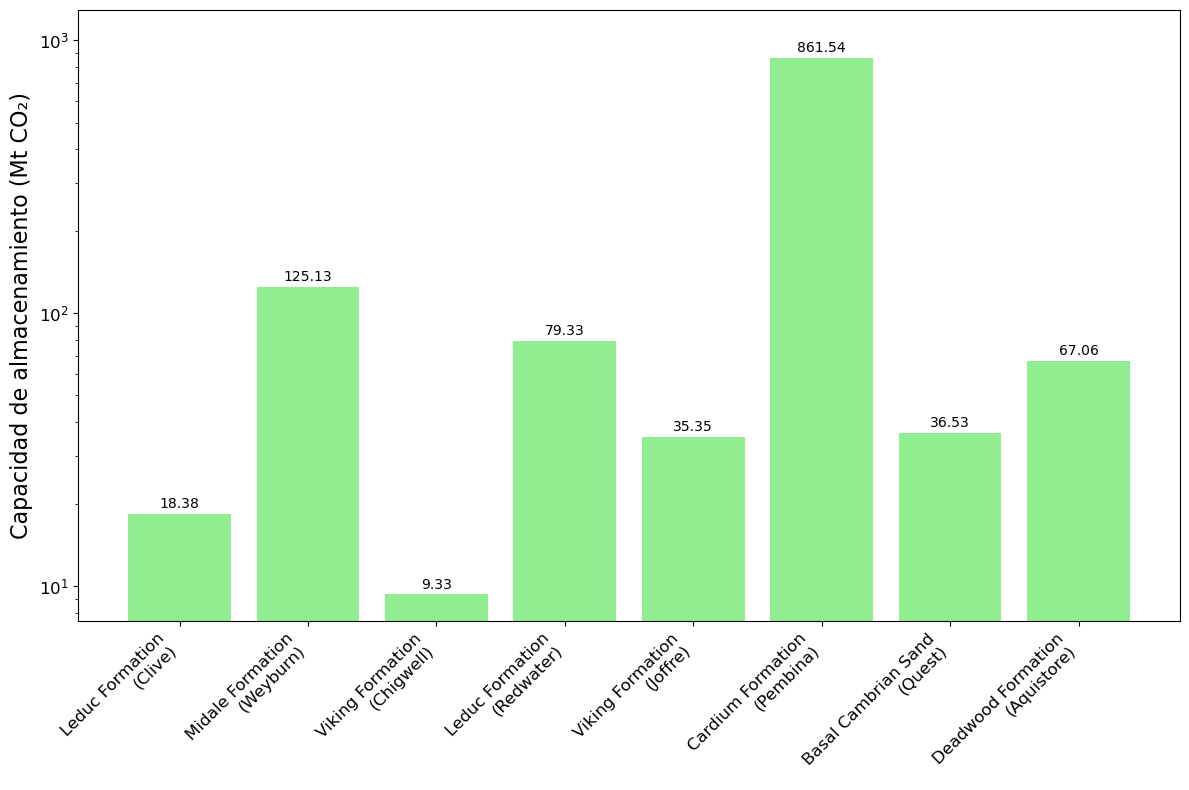

In [48]:
capacidad_canada = {"Leduc Formation\n(Clive)": 18.38, "Midale Formation\n(Weyburn)": 125.13, "Viking Formation\n(Chigwell)": 9.33, "Leduc Formation\n(Redwater)": 79.33, "Viking Formation\n(Joffre)": 35.35, "Cardium Formation\n(Pembina)": 861.54, "Basal Cambrian Sand\n(Quest)": 36.53, "Deadwood Formation\n(Aquistore)": 67.06}

nombres = list(capacidad_canada.keys())
capacidades = list(capacidad_canada.values())

fig, ax = plt.subplots(figsize=(12, 8))
bars = plt.bar(nombres, capacidades, color="lightgreen")
ax.set_yscale("log")
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)  
plt.yticks(fontsize=12)
plt.ylim(bottom=min(capacidades)*0.8, top=max(capacidades)*1.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.05, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

fig.savefig("Plots/capacidad_canada_log.png", dpi=300)

### 4.3.1 Estados Unidos - West Ranch Field

In [49]:
# Datos - 98A Reservoir
P = 1.9271e7  # Pa
T = 352.594  # K
Depth = 1859.28    # m
Rf = 0.50
A = 1.0117e7   # m2
h = 30  # m
ϕ = 0.31
k = 500    # mD
Sw = 0.70
# OOIP = 250881959.4 # m3
#Bo = 1.10

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
# capacity_2 = rho * ((Rf * OOIP)/Bo)
# cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
# print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 8.17 Mt


In [50]:
# Datos - 41A Reservoir
P = 1.8099e7  # Pa
T = 350.372  # K
Depth = 1752.6   # m
Rf = 0.50
A = 1.2141e7   # m2
h = 34  # m
ϕ = 0.30
k = 1700    # mD
Sw = 0.70
# OOIP = 250881959.4 # m3
#Bo = 1.10

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
# capacity_2 = rho * ((Rf * OOIP)/Bo)
# cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
# print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 10.43 Mt


In [51]:
# Datos - Ward Reservoir
P = 1.8271e7  # Pa
T = 350.372  # K
Depth = 1752.6   # m
Rf = 0.50
A = 1.8271e7   # m2
h = 24  # m
ϕ = 0.30
k = 1200    # mD
Sw = 0.70
# OOIP = 250881959.4 # m3
#Bo = 1.10

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
# capacity_2 = rho * ((Rf * OOIP)/Bo)
# cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
# print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 11.18 Mt


In [52]:
# Datos - Glasscock Reservoir
P = 1.7651e7 # Pa
T = 347.594  # K
Depth = 1676.4   # m
Rf = 0.50
A = 1.8271e7   # m2
h = 14  # m
ϕ = 0.27
k = 400    # mD
Sw = 0.70
# OOIP = 250881959.4 # m3
#Bo = 1.10

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
# capacity_2 = rho * ((Rf * OOIP)/Bo)
# cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
# print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 5.89 Mt


In [53]:
# Datos - Greta Reservoir
P = 1.6203e7  # Pa
T = 344.261  # K
Depth = 1676.4    # m
Rf = 0.50
A = 1.8271e7   # m2
h = 27  # m
ϕ = 0.30
k = 1200    # mD
Sw = 0.70
# OOIP = 250881959.4 # m3
#Bo = 1.10

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
# capacity_2 = rho * ((Rf * OOIP)/Bo)
# cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
# print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 12.12 Mt


### 4.3.2 Estados Unidos - Rangely Field

In [54]:
# Datos - Weber Sandstone CO2 EOR
P = 18960590  # Pa
T = 344.261  # K
Depth = 1980   # m
Rf = 0.51
A = 6.2e7   # m2
h = 58  # m
ϕ = 0.12
k = 8    # mD
Sw = 0.31
OOIP = 300e6 # m3
Bo = 1.10

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 95.45 Mt
La capacidad de almacenamiento de CO₂ es de: 87.43 Mt


### 4.3.3 Estados Unidos - Illinois Basin

In [55]:
# Datos - Mount Simon Sandstone (Saline Aquifer) - Dedicated Storage
P = 22e6    # Pa
T = 313.15   # K
Depth = 1690 # m
A = 2e7   # m2
h = 156   # m
ϕ = 0.21 
k = 28    # mD
Swirr = 0.30

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')
rho = round(rho,2)

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1/ 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 393.15 Mt


### 4.3.4 Estados Unidos - Bell Creek Field

In [56]:
# Datos
P = 8.27e6 # Pa
T = 347.039  # K
Depth = 1360    # m
Rf = 0.38
A = 1.94e8  # m2
h = 8  # m
ϕ = 0.25
k = 900    # mD
Sw = 0.50
OOIP = 56122516.9 # m3
Bo = 1.20

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 13.0 Mt
La capacidad de almacenamiento de CO₂ es de: 3.13 Mt


### 4.3.5 Estados Unidos - Farnsworth Unit Oil Field

In [57]:
# Datos - Morrow B Formation CO2 EOR
P = 1.5189e7 # Pa
T = 277.594  # K
Depth = 2330   # m
Rf = 0.16
A = 6.77e7  # m2
h = 25  # m    
ϕ = 0.23 
k = 300    # mD
Sw = 0.54
OOIP = 19078476 # m3
Bo = 1.192

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 28.1 Mt
La capacidad de almacenamiento de CO₂ es de: 2.51 Mt


### 4.3.6 Estados Unidos - Cranfield field

In [58]:
# Datos - Tuscaloosa D-E Formation (Saline Aquifer) - Dedicated Storage
P = 32.4e6 # Pa
T = 398.15  # K
Depth = 3060  # m
A = 3.2e7  # m2
h = 28  # m    
ϕ = 0.255 
k = 100    # mD
Swirr = 0.20

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 109.52 Mt


### 4.3.7 Estados Unidos - Citronelle Field

In [59]:
# Datos - Paluxy Formation (Saline Aquifer) - Dedicated Storage
P = 20.7e6 # Pa
T = 383.15  # K
Depth = 2865  # m
A = 6.63e7  # m2
h = 143  # m    
ϕ = 0.25 
k = 300    # mD
Swirr = 0.30

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 753.19 Mt


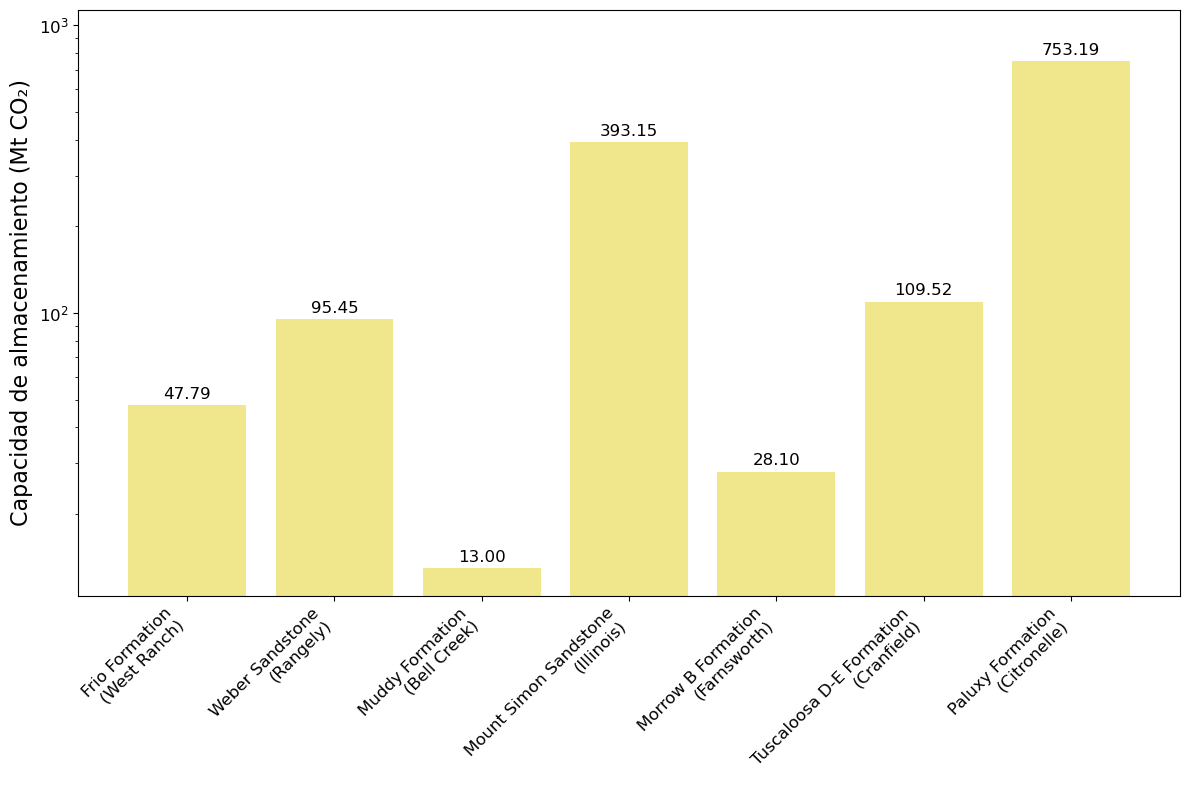

In [60]:
capacidad_usa = {"Frio Formation\n(West Ranch)": 47.79, "Weber Sandstone\n(Rangely)": 95.45, "Muddy Formation\n(Bell Creek)": 13.0, "Mount Simon Sandstone\n(Illinois)": 393.15, "Morrow B Formation\n(Farnsworth)": 28.1, "Tuscaloosa D-E Formation\n(Cranfield)": 109.52, "Paluxy Formation\n(Citronelle)": 753.19}
nombres = list(capacidad_usa.keys())
capacidades = list(capacidad_usa.values())

fig, ax = plt.subplots(figsize=(12,8))
bars = plt.bar(nombres, capacidades, color="khaki")
ax.set_yscale("log")
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)  
plt.yticks(fontsize=12)
plt.ylim(bottom=min(capacidades)*0.8, top=max(capacidades)*1.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.05, f"{yval:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_usa.png", dpi=300)

### 4.4.1 México - Tampico Misantla Basin

In [61]:
# Datos - Cahuasas Formation (Saline Aquifer) - Dedicated Storage
P = 24.2e6 # Pa
T = 399.15  # K
Depth = 3600  # m
A = 4.4731e7  # m2
h = 400 # m    
ϕ = 0.14 
k = 100    # mD
Swirr = 0.30

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 823.39 Mt


### 4.4.2 México - Tampico Misantla Basin

In [62]:
# Datos - Tamaulipas Formation (Saline Aquifer) - Dedicated Storage
P = 28.3e6 # Pa
T = 374.15  # K
Depth = 2900  # m
A = 4.4682e7  # m2
h = 154 # m    
ϕ = 0.09 
k = 100    # mD
Swirr = 0.30

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (A * h * ϕ * (1 - Swirr))
cap1_mt = round(capacity_1 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 275.49 Mt


### 4.2.6 Brasil - Buzios Field

In [63]:
# Datos Itapema Formation
P = 58e6 # Pa
T = 363.15  # K
Depth = 5000   # m
Rf = 0.20
A = 4.16e8 # m2
h = 121.92  # m
ϕ = 0.13
k = 88.7   # mD
Sw = 0.30
OOIP = 4582731822 # m3
Bo = 1.1

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 814.48 Mt
La capacidad de almacenamiento de CO₂ es de: 735.2 Mt


In [64]:
# Datos Barra Velha Formation
P = 58e6 # Pa
T = 363.15  # K
Depth = 5000   # m
Rf = 0.20
A = 4.16e8 # m2
h = 151 # m
ϕ = 0.115
k = 122.6   # mD
Sw = 0.30
OOIP = 4582731822 # m3
Bo = 1.1

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 892.36 Mt
La capacidad de almacenamiento de CO₂ es de: 735.2 Mt


### 4.2.8 Brasil - Tupi Field

In [65]:
# Datos Itapema Formation
P = 58.8e6 # Pa
T = 363.15  # K
Depth = 5000   # m
Rf = 0.23
A = 4.16e8 # m2
h = 121.92  # m
ϕ = 0.13
k = 88.7   # mD
Sw = 0.30
OOIP = 3306780948  # m3
Bo = 1.1

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 940.03 Mt
La capacidad de almacenamiento de CO₂ es de: 612.27 Mt


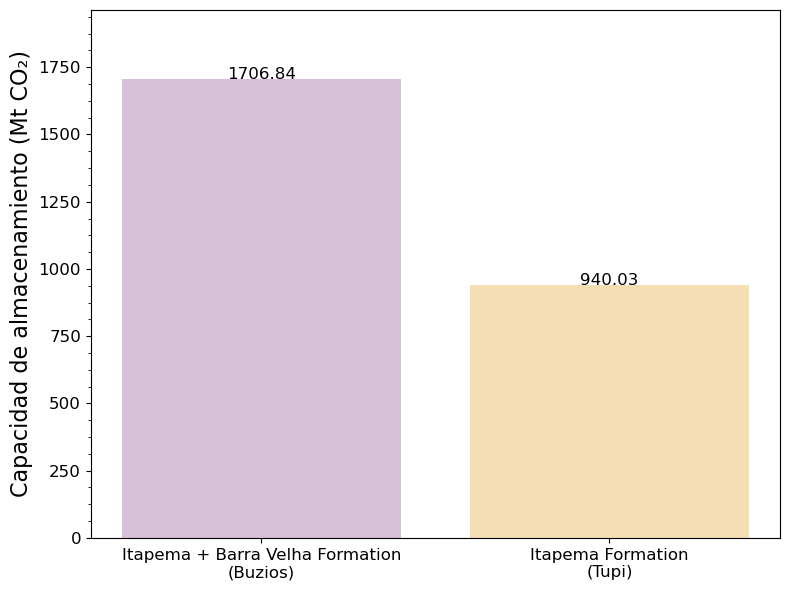

In [66]:
capacidad_brasil = {"Itapema + Barra Velha Formation\n(Buzios)": 1706.84, "Itapema Formation\n(Tupi)": 940.03}
nombres = list(capacidad_brasil.keys())
capacidades = list(capacidad_brasil.values())

fig, ax = plt.subplots(figsize=(8,6))
bars = plt.bar(nombres, capacidades, color=["thistle", "wheat", "lavender"])
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
#plt.title("Reservorios de Brasil", fontsize=18)
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(top=max(capacidades) * 1.15)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_brasil.png", dpi=300)

### 4.2.9 Colombia - Llanos Orientales Basin

In [67]:
# Datos
P = 35e6 # Pa
T = 338.15  # K
Depth = 2744  # m
Rf = 0.40
A = 332581  # m2
h = 119.3  # m
ϕ = 0.23
k = 200  # mD
Sw = 0.38
OOIP = 4583810.05  # m3
Bo = 1.13

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 1.91 Mt
La capacidad de almacenamiento de CO₂ es de: 1.37 Mt


### 4.2.10 Colombia - Valle inferior del Magdalena Basin

In [68]:
# Datos
P = 54468604 # Pa
T = 321.15  # K
Depth = 1859.76  # m
Rf = 0.40
A = 2.42e6 # m2
h = 152.09  # m
ϕ = 0.20
k = 22  # mD
Sw = 0.30
OOIP = 63594920 # m3
Bo = 1.7

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 20.26 Mt
La capacidad de almacenamiento de CO₂ es de: 14.71 Mt


### 4.2.10 Colombia - Valle Superior del Magdalena Basin

In [69]:
# Datos
P = 1.51e7 # Pa
T = 338.15  # K
Depth = 1840.992  # m
Rf = 0.20
A = 525000 # m2
h = 167.64  # m
ϕ = 0.12
k = 50  # mD
Sw = 0.25
OOIP = 3364171.268 # m3
Bo = 1.2

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 0.88 Mt
La capacidad de almacenamiento de CO₂ es de: 0.31 Mt


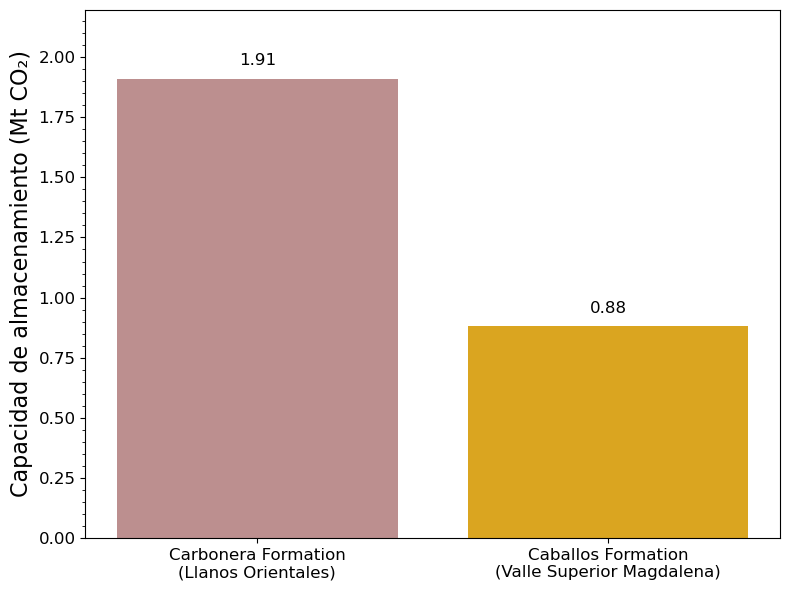

In [70]:
capacidad_colombia = {"Carbonera Formation\n(Llanos Orientales)": 1.91, "Caballos Formation\n(Valle Superior Magdalena)": 0.88}
nombres = list(capacidad_colombia.keys())
capacidades = list(capacidad_colombia.values())

fig, ax = plt.subplots(figsize=(8,6))
bars = plt.bar(nombres, capacidades, color=["rosybrown", "goldenrod"])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#plt.title("Reservorios de Colombia", fontsize=18)
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(top=max(capacidades) * 1.15)

for bar in bars:
    yval = bar.get_height()
    offset = max(capacidades) * 0.03
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f"{yval:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_colombia.png", dpi=300)

### 4.2.11 Ecuador - Yanaquincha Este Field

In [71]:
# Datos
P = 25165874 # Pa
T = 377.59  # K
Depth = 3048  # m
Rf = 0.14
A = 1.98e7 # m2
h = 27.74  # m
ϕ = 0.154
k = 356  # mD
Sw = 0.20
OOIP = 14944806.2 # m3
Bo = 1.19

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 5.41 Mt
La capacidad de almacenamiento de CO₂ es de: 1.0 Mt


### 4.2.12 Ecuador - Sacha Field

In [72]:
# Datos
P = 2.27e7 # Pa
T = 380.372  # K
Depth = 2735.58 # m
Rf = 0.32
A = 2.55e8 # m2
h = 15.24 # m
ϕ = 0.14
k = 70.64  # mD
Sw = 0.34
OOIP = 339838049.0617 # m3
Bo = 1.33

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 58.73 Mt
La capacidad de almacenamiento de CO₂ es de: 41.79 Mt


### 4.2.13 Ecuador - Lago Agrio Field

In [73]:
# Datos
P = 2.36e7 # Pa
T = 367.59  # K
Depth = 3040.38 # m
Rf = 0.30
A = 36e6 # m2
h = 5.4864 # m
ϕ = 0.13
k = 70.64  # mD
Sw = 0.20
OOIP = 30060000.997 # m3
Bo = 1.47

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 3.63 Mt
La capacidad de almacenamiento de CO₂ es de: 3.62 Mt


### 4.2.13 Ecuador - Parahuacu Field

In [74]:
# Datos
P = 2.48e7 # Pa
T = 352.594 # K
Depth = 2649 # m
Rf = 0.08
A = 40416396 # m2
h = 12.92 # m
ϕ = 0.119
k = 384  # mD
Sw = 0.25
OOIP = 25901647.46 # m3
Bo = 1.21

# Densidad del CO₂
rho = PropsSI('D', 'P', P, 'T', T, 'CO2')

# Ecuación 1
capacity_1 = rho * (Rf * A * h * ϕ * (1 - Sw))
cap1_mt = round(capacity_1 / 1e9, 2)

# Ecuación 2
capacity_2 = rho * ((Rf * OOIP)/Bo)
cap2_mt = round(capacity_2 / 1e9, 2)

print(f"La capacidad de almacenamiento de CO₂ es de: {cap1_mt} Mt")
print(f"La capacidad de almacenamiento de CO₂ es de: {cap2_mt} Mt")

La capacidad de almacenamiento de CO₂ es de: 2.56 Mt
La capacidad de almacenamiento de CO₂ es de: 1.18 Mt


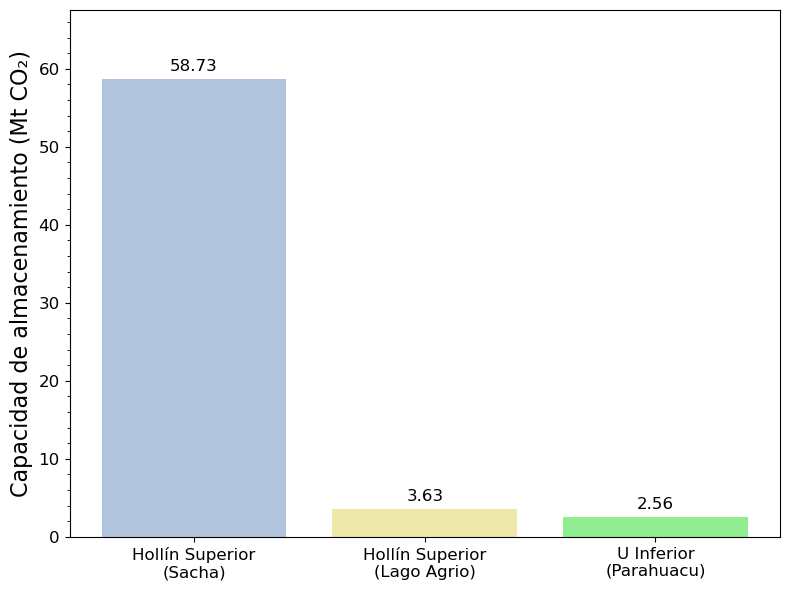

In [75]:
capacidad_ecuador = {"Hollín Superior\n(Sacha)": 58.73, "Hollín Superior\n(Lago Agrio)": 3.63, "U Inferior\n(Parahuacu)": 2.56}
nombres = list(capacidad_ecuador.keys())
capacidades = list(capacidad_ecuador.values())

fig, ax = plt.subplots(figsize=(8,6))
bars = plt.bar(nombres, capacidades, color=["lightsteelblue", "palegoldenrod", "lightgreen"])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#plt.title("Reservorios de Ecuador", fontsize=18)
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(top=max(capacidades) * 1.15)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_ecuador.png", dpi=300)

### Gráfico general de la capacidad de almacenamiento

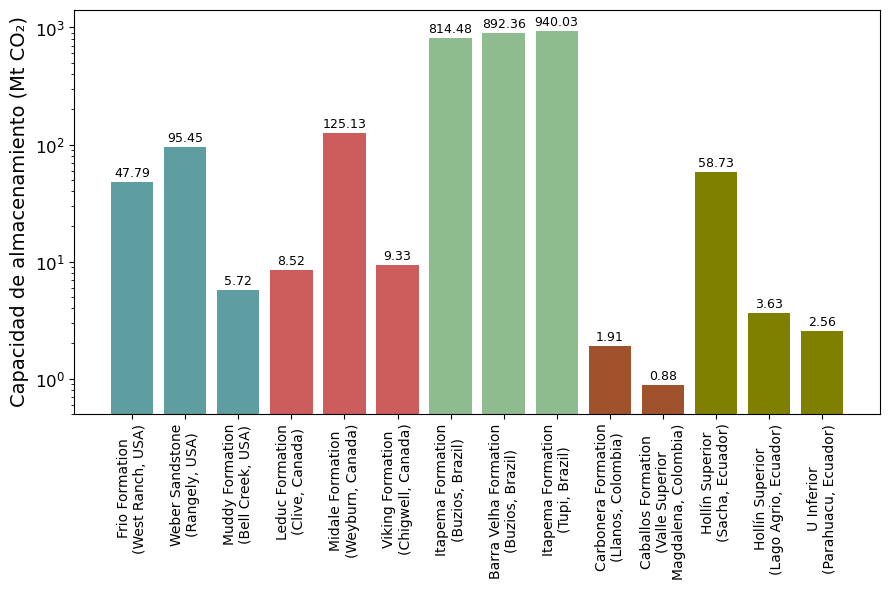

In [76]:
capacidad_total = {
    "Frio Formation\n(West Ranch, USA)": 47.79,
    "Weber Sandstone\n(Rangely, USA)": 95.45,
    "Muddy Formation\n(Bell Creek, USA)": 5.72,
    "Leduc Formation\n(Clive, Canada)": 8.52,
    "Midale Formation\n(Weyburn, Canada)": 125.13,
    "Viking Formation\n(Chigwell, Canada)": 9.33,
    "Itapema Formation\n(Buzios, Brazil)": 814.48,
    "Barra Velha Formation\n(Buzios, Brazil)": 892.36,
    "Itapema Formation\n(Tupi, Brazil)": 940.03,
    "Carbonera Formation\n(Llanos, Colombia)": 1.91,
    "Caballos Formation\n(Valle Superior\nMagdalena, Colombia)": 0.88,
    "Hollín Superior\n(Sacha, Ecuador)": 58.73,
    "Hollín Superior\n(Lago Agrio, Ecuador)": 3.63,
    "U Inferior\n(Parahuacu, Ecuador)": 2.56}

# Colores por país
colores_pais = {
    "USA": "cadetblue",
    "Canada": "indianred",
    "Brazil": "darkseagreen",
    "Colombia": "sienna",
    "Ecuador": "olive"}

# Crear listas
nombres = list(capacidad_total.keys())
capacidades = list(capacidad_total.values())
colores = []

# Asignar color según país
for nombre in nombres:
    if "USA" in nombre:
        colores.append(colores_pais["USA"])
    elif "Canada" in nombre:
        colores.append(colores_pais["Canada"])
    elif "Brazil" in nombre:
        colores.append(colores_pais["Brazil"])
    elif "Colombia" in nombre:
        colores.append(colores_pais["Colombia"])
    elif "Ecuador" in nombre:
        colores.append(colores_pais["Ecuador"])
    else:
        colores.append("gray")

fig, ax = plt.subplots(figsize=(9, 6))
bars = plt.bar(nombres, capacidades, color=colores)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.set_yscale("log")
plt.ylim(bottom=0.5, top=max(capacidades) * 1.5)  

plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

# Etiquetas de valores
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.1, f"{yval:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_total_log.png", dpi=300)

### Gráfico Capacidad de almacenamiento en reservorios de América del Norte

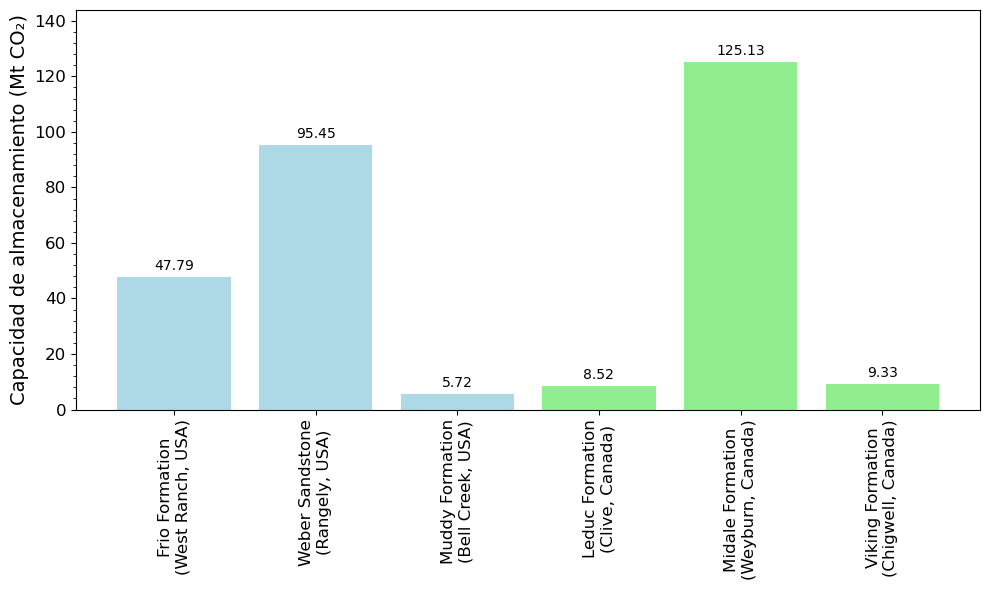

In [77]:
capacidad_norteamerica = {
    "Frio Formation\n(West Ranch, USA)": 47.79,
    "Weber Sandstone\n(Rangely, USA)": 95.45,
    "Muddy Formation\n(Bell Creek, USA)": 5.72,
    "Leduc Formation\n(Clive, Canada)": 8.52,
    "Midale Formation\n(Weyburn, Canada)": 125.13,
    "Viking Formation\n(Chigwell, Canada)": 9.33}

nombres = list(capacidad_norteamerica.keys())
capacidades = list(capacidad_norteamerica.values())

fig, ax = plt.subplots(figsize=(10,6))
bars = plt.bar(nombres, capacidades, color=["lightblue", "lightblue", "lightblue", "lightgreen", "lightgreen", "lightgreen"])
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(top=max(capacidades) * 1.15)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(capacidades)*0.02, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_norteamerica.png", dpi=300)

### Gráfico Capacidad de almacenamiento en reservorios de América del Sur

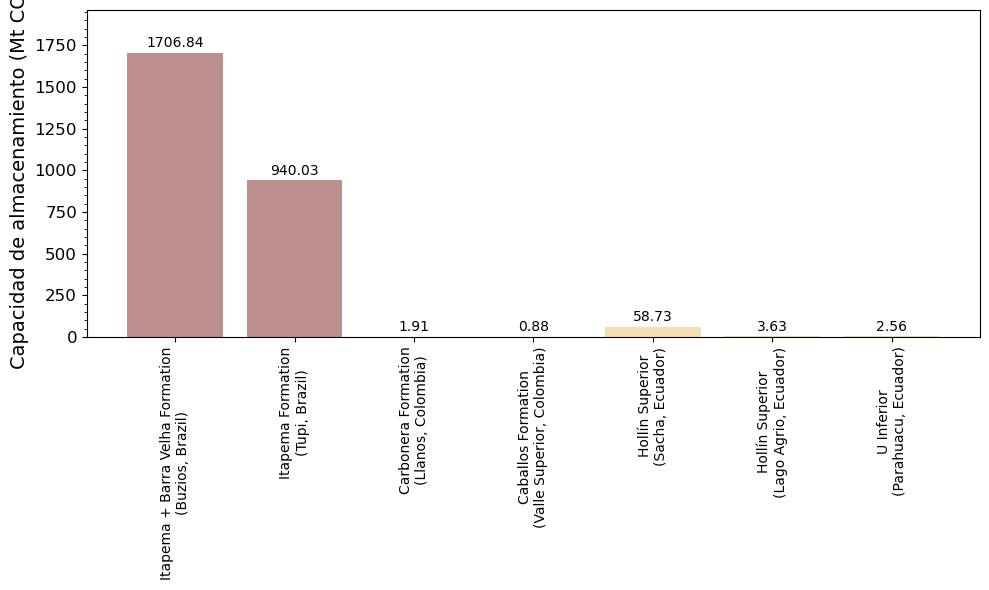

In [78]:
capacidad_suramerica = {
    "Itapema + Barra Velha Formation\n(Buzios, Brazil)": 1706.84,
    "Itapema Formation\n(Tupi, Brazil)": 940.03,
    "Carbonera Formation\n(Llanos, Colombia)": 1.91,
    "Caballos Formation\n(Valle Superior, Colombia)": 0.88,
    "Hollín Superior\n(Sacha, Ecuador)": 58.73,
    "Hollín Superior\n(Lago Agrio, Ecuador)": 3.63,
    "U Inferior\n(Parahuacu, Ecuador)": 2.56}

nombres = list(capacidad_suramerica.keys())
capacidades = list(capacidad_suramerica.values())

colores = ["rosybrown", "rosybrown", "salmon", "salmon", "wheat", "wheat", "wheat"]

fig, ax = plt.subplots(figsize=(10,6))
bars = plt.bar(nombres, capacidades, color=colores)
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(top=max(capacidades) * 1.15)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(capacidades)*0.02, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_suramerica.png", dpi=300)

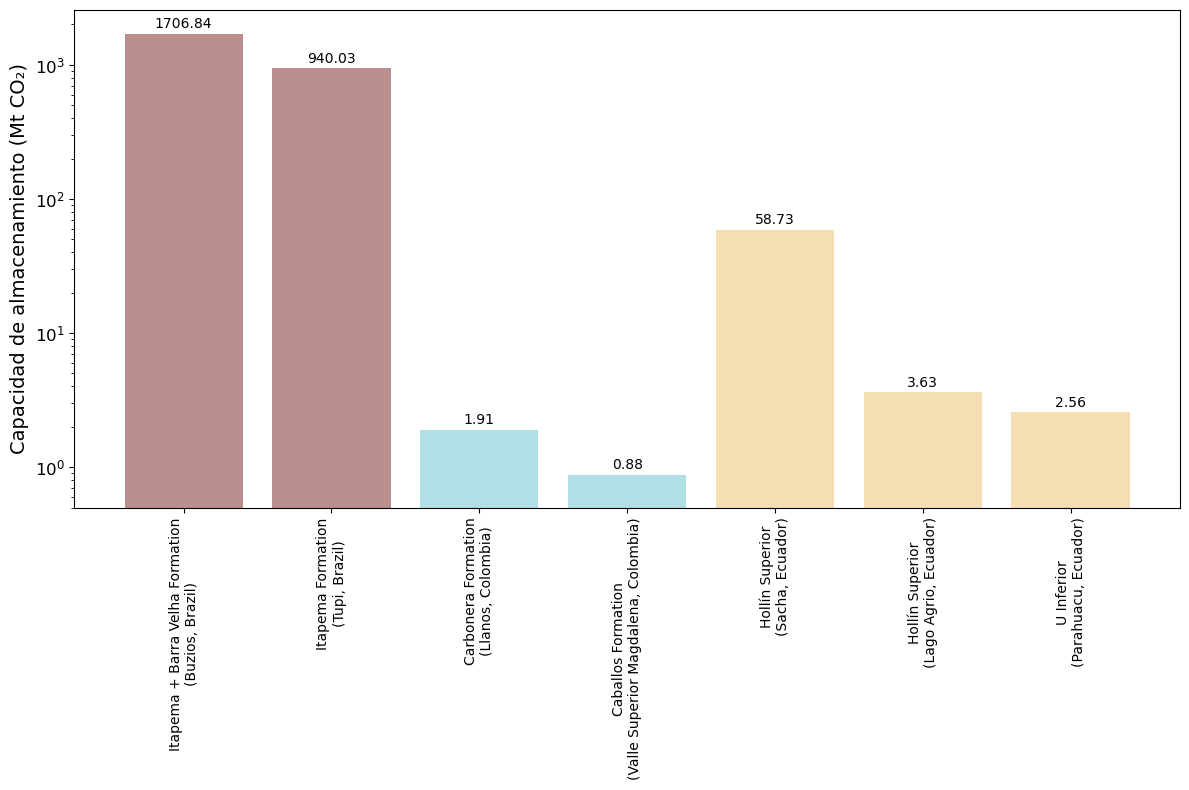

In [79]:
capacidad_suramerica = {
    "Itapema + Barra Velha Formation\n(Buzios, Brazil)": 1706.84,
    "Itapema Formation\n(Tupi, Brazil)": 940.03,
    "Carbonera Formation\n(Llanos, Colombia)": 1.91,
    "Caballos Formation\n(Valle Superior Magdalena, Colombia)": 0.88,
    "Hollín Superior\n(Sacha, Ecuador)": 58.73,
    "Hollín Superior\n(Lago Agrio, Ecuador)": 3.63,
    "U Inferior\n(Parahuacu, Ecuador)": 2.56}

nombres = list(capacidad_suramerica.keys())
capacidades = list(capacidad_suramerica.values())
colores = ["rosybrown", "rosybrown", "powderblue", "powderblue", "wheat", "wheat", "wheat"]

fig, ax = plt.subplots(figsize=(12,8))
bars = plt.bar(nombres, capacidades, color=colores)

# Aplicar escala logarítmica
ax.set_yscale('log')

plt.ylabel("Capacidad de almacenamiento (Mt CO₂)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(bottom=0.5, top=max(capacidades) * 1.5) 

# Mostrar valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.1, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
fig.savefig("Plots/capacidad_suramerica.png", dpi=400)